In [1]:
# This program compute the minimal GKZ vector associated to a point-configuration
# using secondary_polytope() in Sagemath and symbolic minimize in Mathematica
# input: point-configuration A
# output: fraction minimal GKZ vector

In [2]:
reset()

In [3]:
A = [[0], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16]] # point-configuration

# [[0], [7], [8], [9], [10], [11], [12], [13], [14], [15]] 1-dim nonaffine mGKZ
# mather example [4,0,0], [0,4,0], [0,0,4], [2,1,1], [1,2,1], [1,1,2]
# Naoto's five points [0,0], [1,0], [2,0], [1,1], [0,1]
# skew four points [0,0], [1,2], [2,1], [17,9]
# [1,0], [9,0], [24,7], [3,3], [0,1]
# Yotsutani-Zhou C2 [0,-1,1], [2,-1,-1], [2,0,-1], [0,0,1], [-1,3,-1], [-1,1,1], [-1,-1,-1], [-1,-1,1]

A中点的个数: 11
Q=conv(A)的面数: 2
Q=conv(A)的顶点数: 2


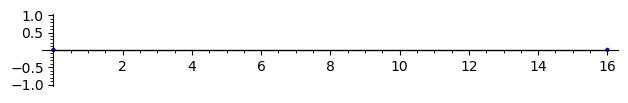

In [4]:
Ap = PointConfiguration(A)
Q = Polyhedron(A)
N = len(A) # 点的个数
n = len(A[0]) # 维数
f = len(Q.faces(n-1))
v = Q.n_vertices()
print("A中点的个数:", N)
print("Q=conv(A)的面数:", f)
print("Q=conv(A)的顶点数:", v)
Q.show(aspect_ratio=1, axes=True)

In [5]:
# 构成secondary polytope SP
SP = Ap.secondary_polytope()
# SP.Vrepresentation()
# SP.Hrepresentation()  # 其中含有 n+1 个等式约束

In [6]:
# 将 SP 的约束改写成 Mathematica 的格式存入文件
# 从 SP.Hrepresentation() 获取等式约束
equations = []
for ineq in SP.Hrepresentation():
    if isinstance(ineq, sage.geometry.polyhedron.representation.Equation):
        # 获取系数并转换为列表
        coeffs = list(ineq.vector())
        equations.append(coeffs)

# 格式化输出字符串
output = "{"
for i, eq in enumerate(equations):
    output += "{" + ", ".join(map(str, eq)) + "}"
    if i < len(equations)-1:
        output += ", "
output += "}"

# 将等式约束写入文件 equations.txt
with open('equations.txt', 'w') as f:
    f.write(output)


# 从 SP.Hrepresentation() 获取不等式约束
inequalities = []
for ineq in SP.Hrepresentation():
    if isinstance(ineq, sage.geometry.polyhedron.representation.Inequality):
        # 获取系数并转换为列表
        coeffs = list(ineq.vector())
        inequalities.append(coeffs)

# 格式化输出字符串
output = "{"
for i, ineq in enumerate(inequalities):
    output += "{" + ", ".join(map(str, ineq)) + "}"
    if i < len(inequalities)-1:
        output += ", "
output += "}"

# 将不等式约束写入文件 inequations.txt
with open('inequalities.txt', 'w') as f:
    f.write(output)


In [7]:
#>>>>>>>>Run nearest-point.nb in MATHEMATICA，and then run Sage from this cell.
with open('/Users/mac/Nutstore Files/我的坚果云/mGKZ codes/mac/mGKZ.txt', 'r') as f:
    content = f.read().strip()
    # 去掉首尾的大括号
    content = content[1:-1]
    # 分割每个分数字符串
    fractions = content.split(',')
    # 将每个分数字符串转换为分数
    mGKZ = []
    for frac in fractions:
        frac = frac.strip()
        if '/' in frac:
            num, den = map(int, frac.split('/'))
            mGKZ.append(QQ(num)/QQ(den))
        else:
            mGKZ.append(QQ(int(frac)))


print("mini GKZ vector: ", mGKZ)



mini GKZ vector:  [1217/157, 643/157, 561/157, 479/157, 397/157, 11/5, 2, 9/5, 8/5, 7/5]


In [8]:
# 计算 mGKZ 的 lower convex envelop
liftA = [a + [b] for a, b in zip(A, mGKZ)]
liftQ = Polyhedron(liftA)
HLQ = liftQ.Hrepresentation()
lowHLQ = [ineq for ineq in HLQ if ineq[n+1] > 0]
HLQ

(An inequality (82, 157) x - 1217 >= 0,
 An inequality (-1662, -3925) x + 30425 >= 0,
 An inequality (1, 5) x - 22 >= 0,
 An inequality (258, 785) x - 4565 >= 0)

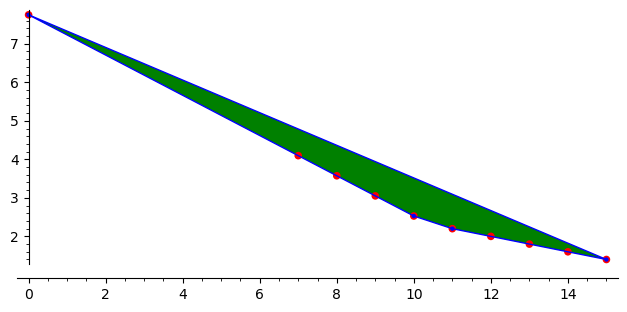

In [9]:
F1 = liftQ.plot(axes=True)
F2 = point2d(liftA, color='red', size=30)
F3 = F1 + F2

# 显示结果
F3.show()